# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






Scatterplot : des points de données individuels sur un plan cartésien. Pour explorer la relation entre deux variables, identifier des tendances, des regroupements ou des valeurs aberrantes.

Barplot : barres rectangulaires pour représenter la fréquence ou la valeur d'une variable catégorique. Pour comparer la fréquence ou la valeur de différentes catégories.

Boxplot : Permet affiche la distribution d'une variable quantitative en utilisant des quartiles. Pour comparer la distribution d'une variable entre différents groupes ou pour identifier des valeurs aberrantes.

Violinplot : Similaire à un boxplot, mais il montre également la densité de probabilité des données. Pour comparer la distribution d'une variable entre différents groupes et pour visualiser la forme de la distribution.

Histogramme : Un histogramme affiche la distribution d'une variable quantitative en utilisant des barres. Pour visualiser la distribution d'une seule variable quantitative.

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
Un tableau
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Votre réponse ici
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/MyDrive/overview.txt', 'r') as f:
    lines = f.readlines()

print(len(lines) - 1)


Mounted at /content/drive
87888


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Le plus haut niveau de classification des êtres vivants
Division taxonomique : Archées, Bactéries, Eucaryotes ou Virus.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
4
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [ ]:
import pandas as pd

data = []
for line in lines[1:]:
    parts = line.strip().split('\t')
    data.append(parts)

df = pd.DataFrame(data, columns=lines[0].strip().split('\t'))
df['Size (Mb)'] = pd.to_numeric(df['Size (Mb)'], errors='coerce')
print(df['Kingdom'].value_counts())

Kingdom
Bacteria     37492
Viruses      32573
Eukaryota    15560
Archaea       2263
Name: count, dtype: int64


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
C'est un ensemble d'êtres vivants dans un royaume
```

Q9. Combien de groupes sont présents par royaume ?

In [ ]:
import pandas as pd

group_counts_by_kingdom = df.groupby('Kingdom')['Group'].nunique()
group_counts_by_kingdom


,Group
Kingdom,
Archaea,11
Bacteria,37
Eukaryota,5
Viruses,8


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [ ]:
organism_counts_by_kingdom_group = df.groupby(['Kingdom', 'Group']).size().unstack(fill_value=0)
organism_counts_by_kingdom_group


Group,Acidobacteriota,Animals,Aquificota,Asgard group,Atribacterota,Bacteria incertae sedis,Bdellovibrionota,Caldisericota/Cryosericota group,Calditrichota,Campylobacterota,...,Thermotogota,delta/epsilon subdivisions,dsRNA viruses,environmental samples,unclassified Archaea,unclassified Bacteria,unclassified archaeal viruses,unclassified phages,unclassified virophages,unclassified viruses
Kingdom,,,,,,,,,,,,,,,,,,,,,
Archaea,0,0,0,61,0,0,0,0,0,0,...,0,0,0,5,57,0,0,0,0,0
Bacteria,256,0,42,0,43,3872,122,21,10,256,...,72,288,0,4,0,346,0,0,0,0
Eukaryota,0,7789,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Viruses,0,0,0,0,0,0,0,0,0,0,...,0,0,30,0,0,0,15,1233,3,684


## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

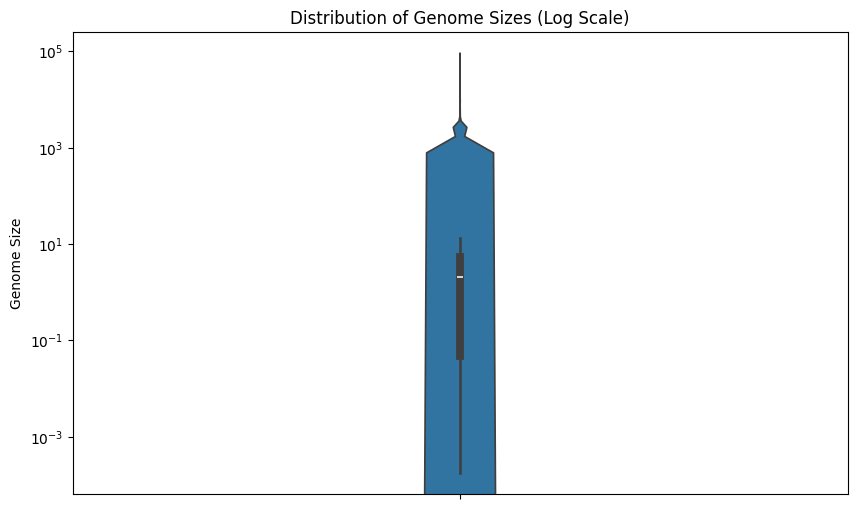

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Size (Mb)'] = pd.to_numeric(df['Size (Mb)'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.violinplot(y=df['Size (Mb)'])
plt.yscale('log')
plt.title('Distribution of Genome Sizes (Log Scale)')
plt.ylabel('Genome Size')
plt.show()

Q12. Affichez la distribution par royaume.

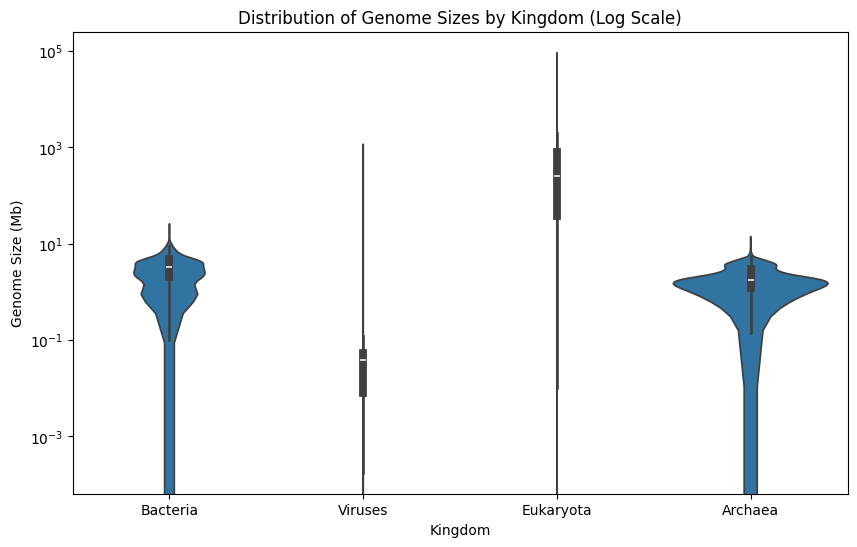

In [ ]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Kingdom', y='Size (Mb)', data=df)
plt.yscale('log')
plt.title('Distribution of Genome Sizes by Kingdom (Log Scale)')
plt.ylabel('Genome Size (Mb)')
plt.xlabel('Kingdom')
plt.show()


Q13. Affichez la distribution par groupe pour chaque royaume.

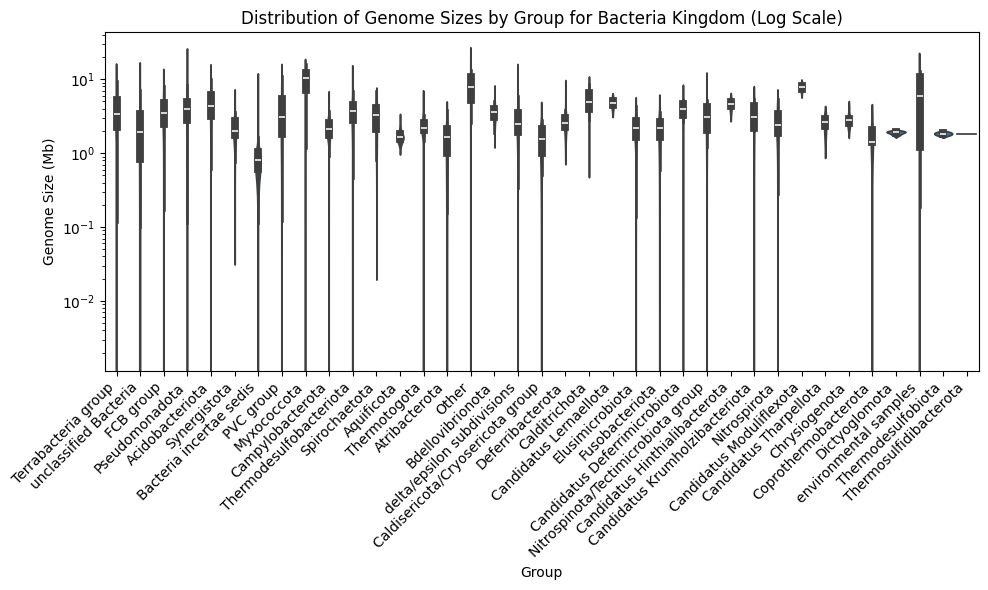

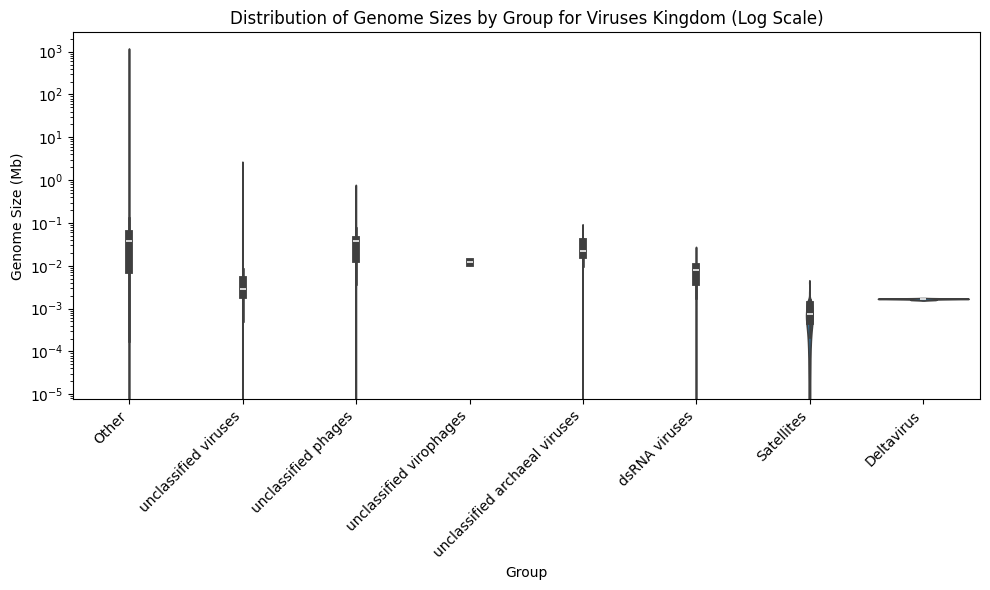

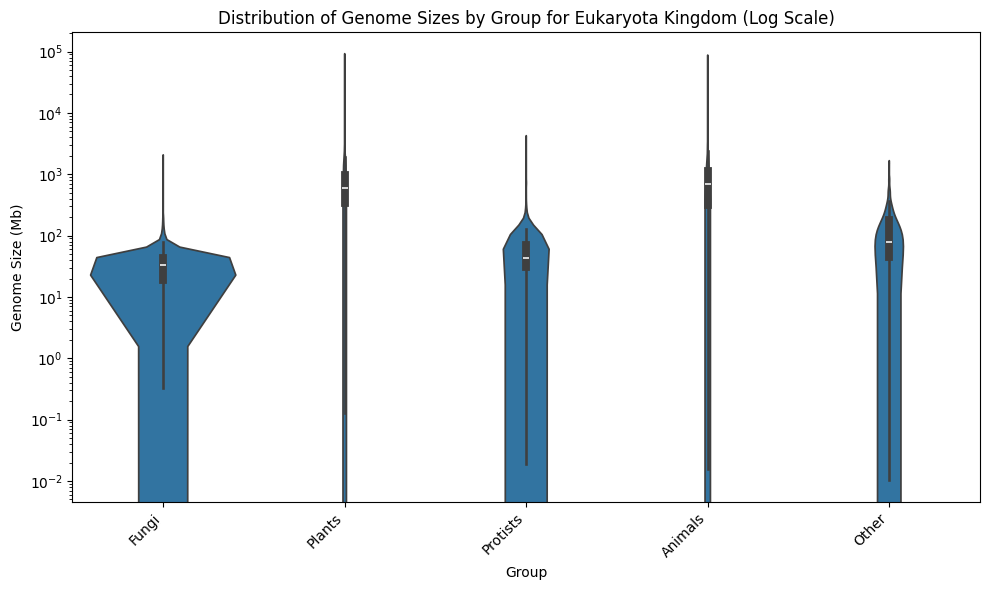

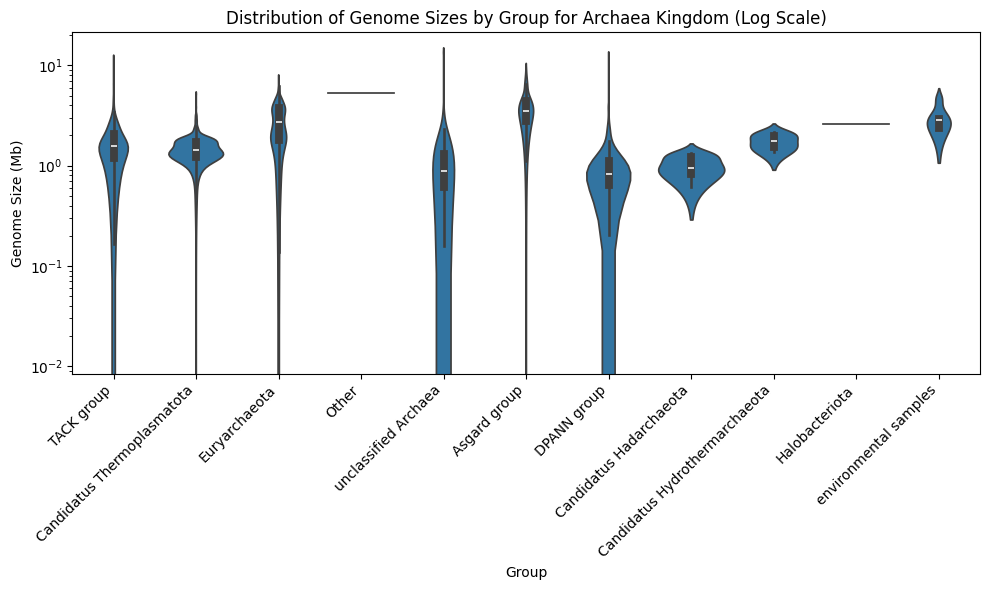

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for kingdom in df['Kingdom'].unique():
  kingdom_df = df[df['Kingdom'] == kingdom]
  plt.figure(figsize=(10, 6))
  sns.violinplot(x='Group', y='Size (Mb)', data=kingdom_df)
  plt.yscale('log')
  plt.title(f'Distribution of Genome Sizes by Group for {kingdom} Kingdom (Log Scale)')
  plt.ylabel('Genome Size (Mb)')
  plt.xlabel('Group')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [ ]:
df['Size (Mb)'] = pd.to_numeric(df['Size (Mb)'], errors='coerce')

for kingdom in df['Kingdom'].unique():
    kingdom_df = df[df['Kingdom'] == kingdom]
    min_genome_organism = kingdom_df.loc[kingdom_df['Size (Mb)'].idxmin()]
    print(f"Kingdom: {kingdom}")
    print(f"Organism with smallest genome: {min_genome_organism['#Organism/Name']}")
    print(f"Genome Size: {min_genome_organism['Size (Mb)']} Mb\n")


Kingdom: Bacteria
Organism with smallest genome: bacterium AG-323-L21
Genome Size: 0.101587 Mb

Kingdom: Viruses
Organism with smallest genome: Hippotragine gammaherpesvirus 1
Genome Size: 0.000174 Mb

Kingdom: Eukaryota
Organism with smallest genome: Fragilariopsis kerguelensis
Genome Size: 0.010223 Mb

Kingdom: Archaea
Organism with smallest genome: candidate division MSBL1 archaeon SCGC-AAA385M02
Genome Size: 0.137797 Mb



Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [ ]:
df['Size (Mb)'] = pd.to_numeric(df['Size (Mb)'], errors='coerce')

for kingdom in df['Kingdom'].unique():
    kingdom_df = df[df['Kingdom'] == kingdom]
    max_genome_organism = kingdom_df.loc[kingdom_df['Size (Mb)'].idxmax()]
    print(f"Kingdom: {kingdom}")
    print(f"Organism with smallest genome: {max_genome_organism['#Organism/Name']}")
    print(f"Genome Size: {max_genome_organism['Size (Mb)']} Mb\n")

Kingdom: Bacteria
Organism with smallest genome: Thiomonas
Genome Size: 25.1426 Mb

Kingdom: Viruses
Organism with smallest genome: uncultured virus
Genome Size: 1150.68 Mb

Kingdom: Eukaryota
Organism with smallest genome: Viscum album
Genome Size: 91113.7 Mb

Kingdom: Archaea
Organism with smallest genome: archaeon
Genome Size: 13.3999 Mb



## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

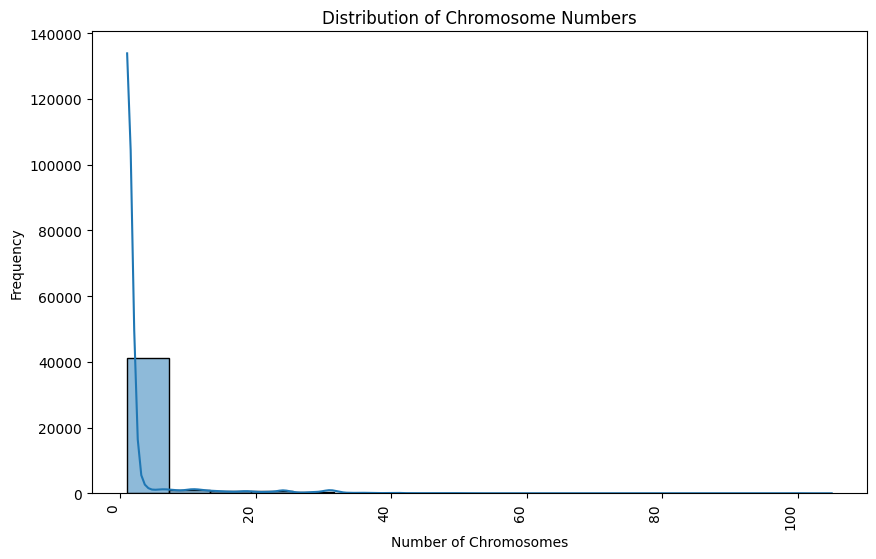

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Chrs'] = pd.to_numeric(df['Chrs'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.histplot(df['Chrs'], kde=True)
plt.title('Distribution of Chromosome Numbers')
plt.xlabel('Number of Chromosomes')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.show()


Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

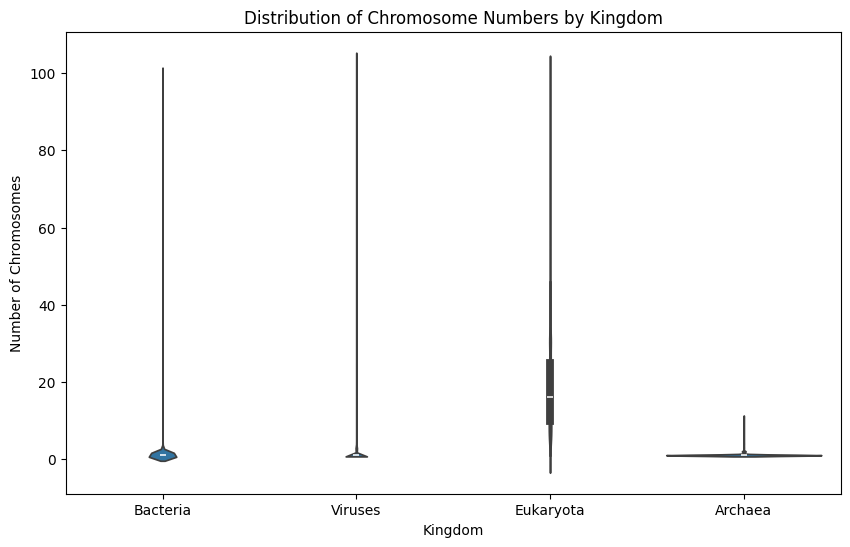

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Kingdom', y='Chrs', data=df)
plt.title('Distribution of Chromosome Numbers by Kingdom')
plt.ylabel('Number of Chromosomes')
plt.xlabel('Kingdom')
plt.show()


Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Votre réponse ici
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

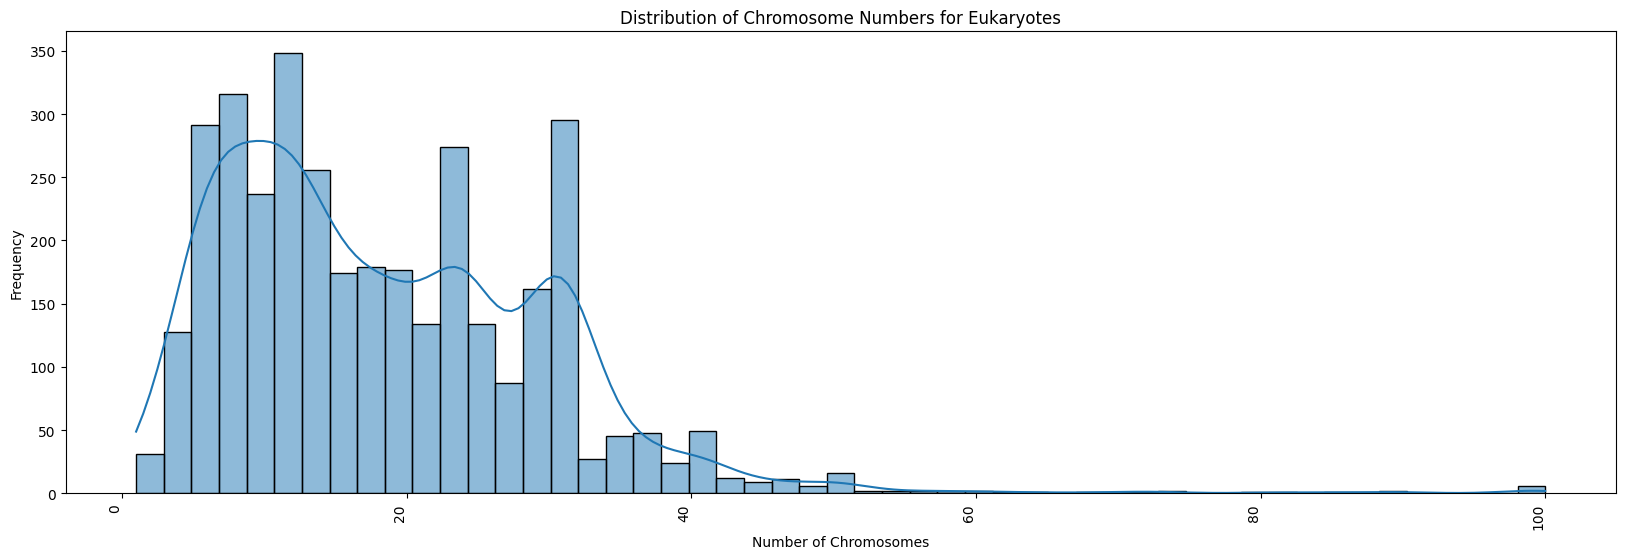

In [ ]:
eukaryotes_df = df[df['Kingdom'] == 'Eukaryota']

plt.figure(figsize=(20, 6))
sns.histplot(eukaryotes_df['Chrs'], kde=True)
plt.title('Distribution of Chromosome Numbers for Eukaryotes')
plt.xlabel('Number of Chromosomes')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.show()


Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

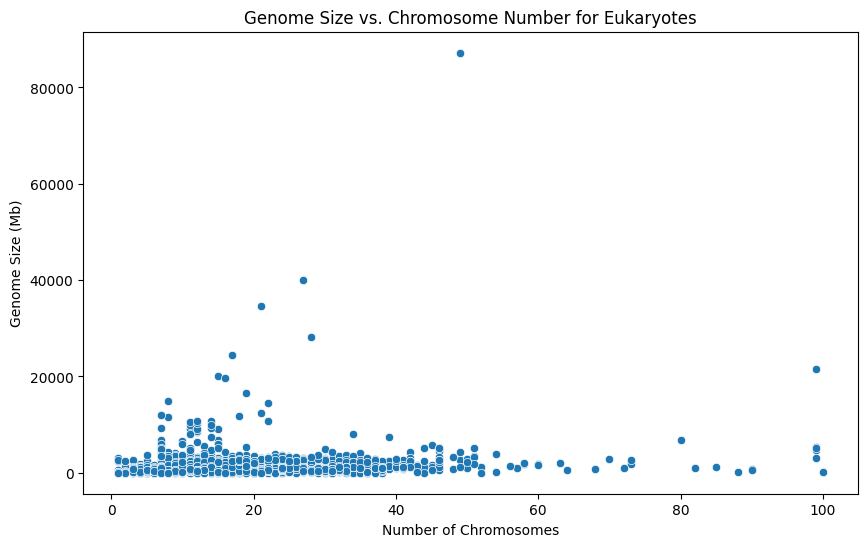

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Chrs', y='Size (Mb)', data=eukaryotes_df)
plt.title('Genome Size vs. Chromosome Number for Eukaryotes')
plt.xlabel('Number of Chromosomes')
plt.ylabel('Genome Size (Mb)')
plt.show()


Q21. Qu’observez-vous ?

```markdown
Votre réponse ici
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Un plasmide est une petite molécule d'ADN circulaire, distincte de l'ADN chromosomique, qui peut se répliquer de manière autonome.
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

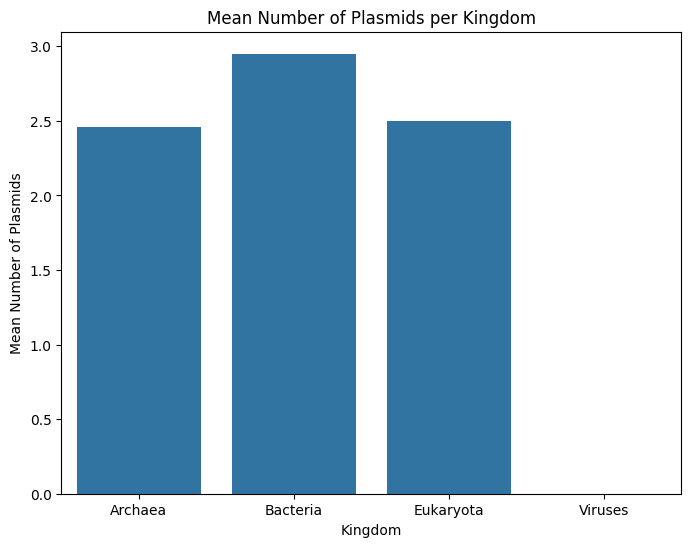

In [ ]:
df['Plasmids'] = pd.to_numeric(df['Plasmids'], errors='coerce')
mean_plasmids_by_kingdom = df.groupby('Kingdom')['Plasmids'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=mean_plasmids_by_kingdom.index, y=mean_plasmids_by_kingdom.values)
plt.title('Mean Number of Plasmids per Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Mean Number of Plasmids')
plt.show()


Q24. Qu'observez-vous ?

```markdown
Votre réponse ici
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Projets biologiques fait sur les espèces en question
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

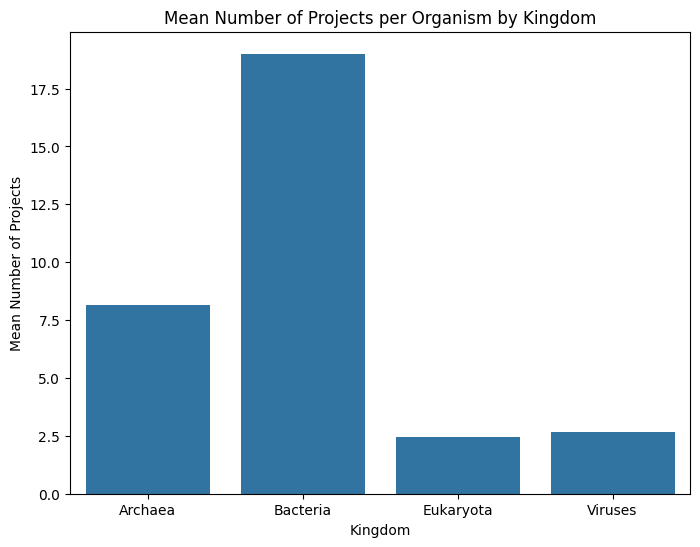

In [ ]:
df['BioProjects'] = pd.to_numeric(df['BioProjects'], errors='coerce')
mean_projects_by_kingdom = df.groupby('Kingdom')['BioProjects'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=mean_projects_by_kingdom.index, y=mean_projects_by_kingdom.values)
plt.title('Mean Number of Projects per Organism by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Mean Number of Projects')
plt.show()


Q27. Combien d'organismes ont 0 projets ?

In [ ]:
zero_projects_count = len(df[df['BioProjects'] == '0'])
zero_projects_count


0

Q28. Combien d'organismes ont > 1 projets ?

In [ ]:
zero_projects_count = len(df[df['BioProjects'] > 1])
zero_projects_count

18947

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [ ]:
df['BioProjects'] = pd.to_numeric(df['BioProjects'], errors='coerce')

top_organisms = df.sort_values('BioProjects', ascending=False)

top_5_organisms = top_organisms.head(5)

print(top_5_organisms[['#Organism/Name', 'BioProjects']])

                             #Organism/Name  BioProjects
29710                      Escherichia coli      39907.0
41700                 Klebsiella pneumoniae      21229.0
75957                 Staphylococcus aureus      17228.0
70775                   Salmonella enterica      16613.0
83689  uncultured Lachnospiraceae bacterium      15909.0


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Votre réponse ici
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Pourcentage de G et C (nucléotide) dans l'ADN, Le GC-content est mesuré pour comprendre la stabilité moléculaire et la structure de l'ADN.
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

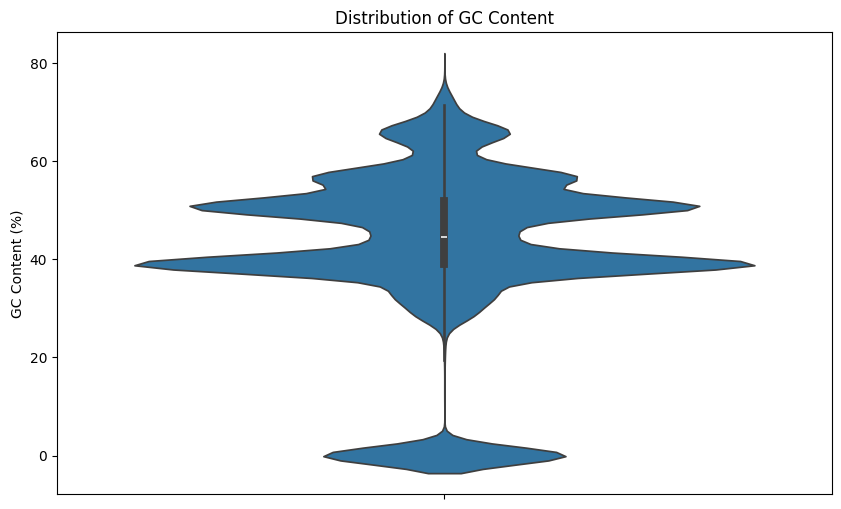

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/assembly_summary_genbank_historical.txt', header=0, skiprows=1, sep='\t')

df2['gc_percent'] = pd.to_numeric(df2['gc_percent'], errors='coerce')
df2['total_gene_count'] = pd.to_numeric(df2['total_gene_count'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.violinplot(y=df2['gc_percent'])
plt.title('Distribution of GC Content')
plt.ylabel('GC Content (%)')
plt.show()


Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

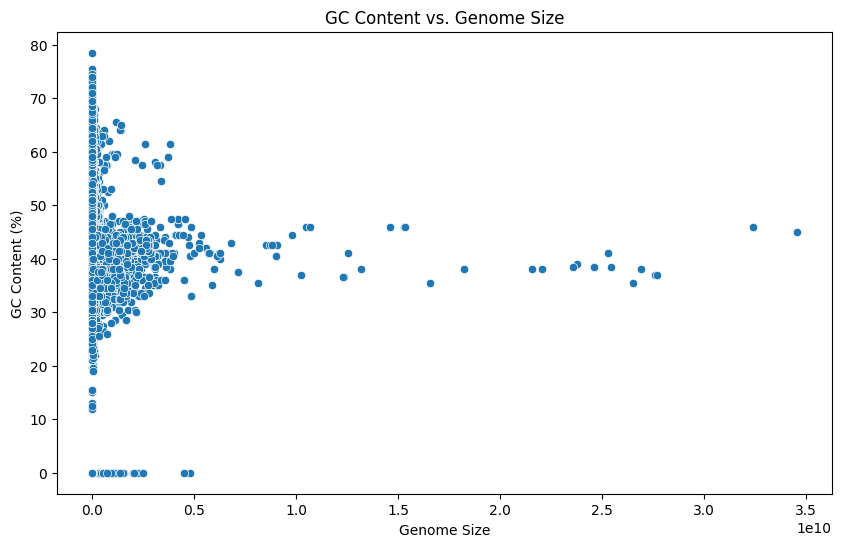

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='genome_size', y='gc_percent', data=df2)
plt.title('GC Content vs. Genome Size')
plt.xlabel('Genome Size')
plt.ylabel('GC Content (%)')
plt.show()


Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

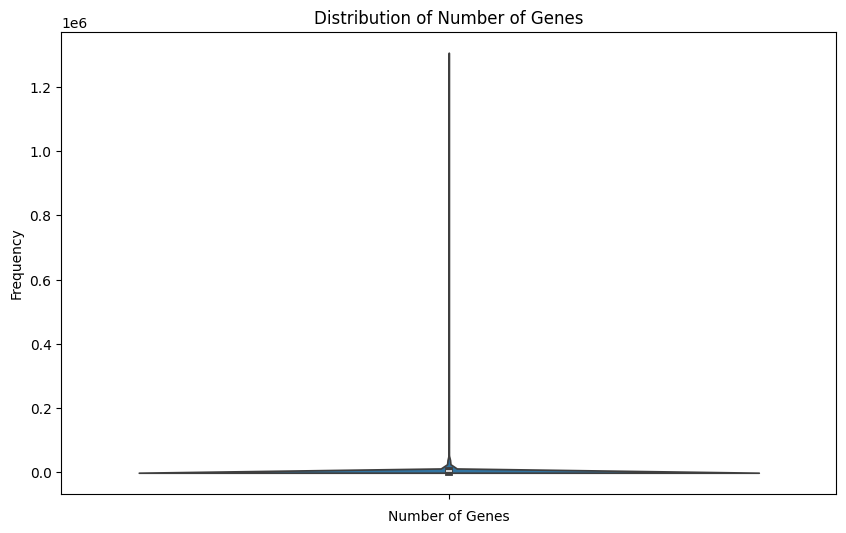

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(df2['total_gene_count'])
plt.title('Distribution of Number of Genes')
plt.xlabel('Number of Genes')
plt.ylabel('Frequency')
plt.show()


Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

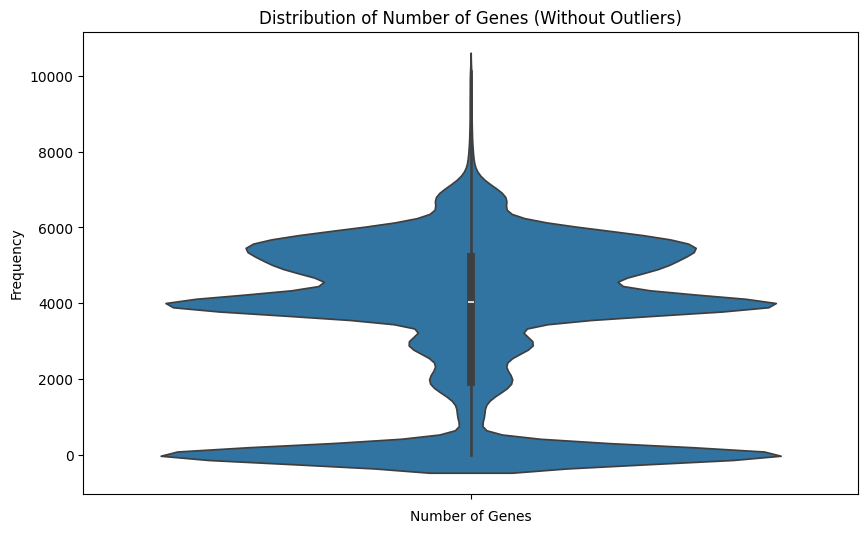

In [ ]:
import numpy as np

Q1 = df2['total_gene_count'].quantile(0.25)
Q3 = df2['total_gene_count'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2_no_outliers = df2[(df2['total_gene_count'] >= lower_bound) & (df2['total_gene_count'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.violinplot(df2_no_outliers['total_gene_count'])
plt.title('Distribution of Number of Genes (Without Outliers)')
plt.xlabel('Number of Genes')
plt.ylabel('Frequency')
plt.show()


Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
J'ai utilisé la méthode de l'écart interquartile (IQR) pour identifier et supprimer les valeurs aberrantes de la colonne

J'ai ensuite pris les valeures entre le lowerbound et upperbound pour ne pas avoir les valeurs non comprises entre les limites
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

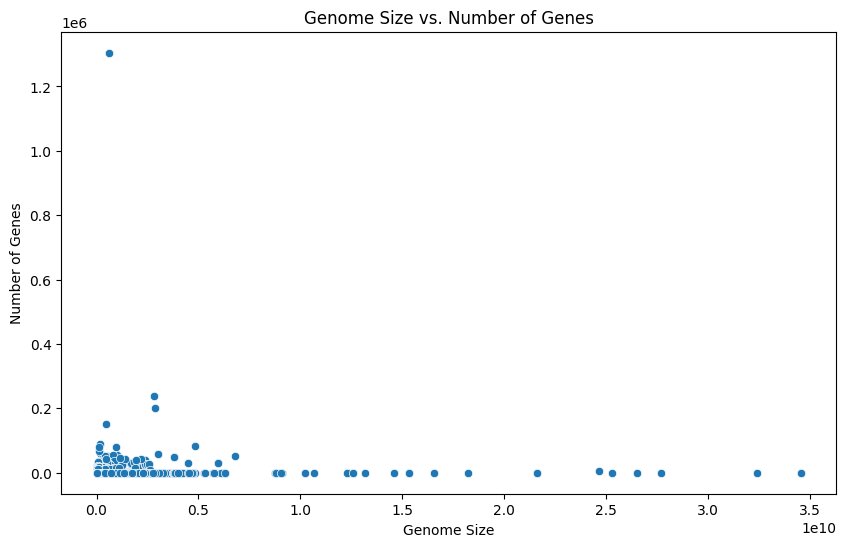

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='genome_size', y='total_gene_count', data=df2)
plt.title('Genome Size vs. Number of Genes')
plt.xlabel('Genome Size')
plt.ylabel('Number of Genes')
plt.show()

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici